In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [3]:
optMatrix = np.array([['q',111],
             ['w',500],
             ['e',20],
             ['r',80],
             ['t',50],
             ['y',180],
             ['u',1701],
             ['i',108],
             ['o',1780],
             ['p',18],
             ['a',10],
             ['s',178],
             ['d',10],
             ['g',109],
             ['h',1780],
             ['j',980],
             ['k',480],
             ['l',2480],
             ['z',500],
             ['x',30]])


optMatrix[:,1]

array(['111', '500', '20', '80', '50', '180', '1701', '108', '1780', '18',
       '10', '178', '10', '109', '1780', '980', '480', '2480', '500',
       '30'], dtype='<U11')

In [4]:
def optJobs(jobs, N_bucets = 4):
    maksMinGlobal = 9999999
    optCost = []
    optName = []
    optHistoty = []
    for k in range(50000):
        np.random.shuffle(jobs)
        tempList = jobs.copy()
        tempCost = jobs[:,1]
        tempName = jobs[:,0]

        randomIndex = np.arange(len(tempList))

        bucketCost = []
        bucketName = []
        
        for j in range(0, N_bucets):
            randomIndex = np.arange(len(randomIndex))
            if j != N_bucets - 1:
                selectRandomIndex = np.random.choice(randomIndex, size = np.random.randint(2,len(randomIndex) // 2), replace = False)
            else:
                selectRandomIndex = randomIndex
            
            
            radnomCost = np.take(tempCost, selectRandomIndex).astype(int)
            randomName = np.take(tempName, selectRandomIndex)

            bucketCost.append(radnomCost)
            bucketName.append(randomName)

            randomIndex = np.delete(randomIndex, selectRandomIndex)
            tempCost = np.delete(tempCost, selectRandomIndex)
            tempName = np.delete(tempName, selectRandomIndex)
        
        maksLocal = 0
        for costList in bucketCost:
            maksLocal = max(maksLocal, np.sum(costList))
            
        if maksLocal <= maksMinGlobal:
            maksMinGlobal = maksLocal
            optCost = bucketCost
            optName = bucketName
            
        optHistoty.append(maksMinGlobal)
        
    return maksMinGlobal, optCost, optName, optHistoty
        
maksMinGlobal, optCost, optName, optHistoty = optJobs(optMatrix)

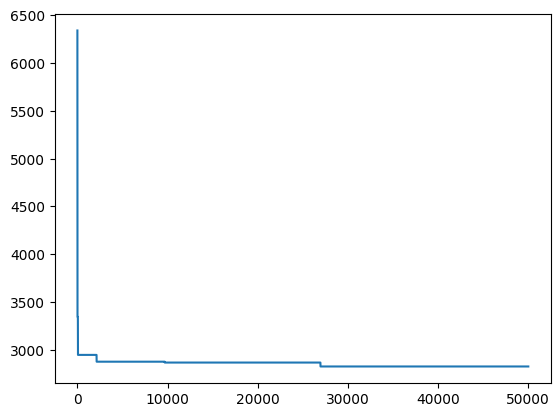

In [5]:
plt.plot(optHistoty)

In [6]:
optCost

[array([  10,  178, 2480,  109]),
 array([  30, 1701,   20,   10,  980]),
 array([ 500,  480, 1780]),
 array([  18,  108,   80,   50,  111,  180, 1780,  500])]

In [7]:
optName

[array(['d', 's', 'l', 'g'], dtype='<U11'),
 array(['x', 'u', 'e', 'a', 'j'], dtype='<U11'),
 array(['z', 'k', 'o'], dtype='<U11'),
 array(['p', 'i', 'r', 't', 'q', 'y', 'h', 'w'], dtype='<U11')]

In [8]:
for cost, name in zip(optCost, optName):
    print("Bucket Cost -", cost, "Elements -", name)

Bucket Cost - [  10  178 2480  109] Elements - ['d' 's' 'l' 'g']
Bucket Cost - [  30 1701   20   10  980] Elements - ['x' 'u' 'e' 'a' 'j']
Bucket Cost - [ 500  480 1780] Elements - ['z' 'k' 'o']
Bucket Cost - [  18  108   80   50  111  180 1780  500] Elements - ['p' 'i' 'r' 't' 'q' 'y' 'h' 'w']
